In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
path = 'FXCM/historical_prices/H1/EUR_USD_H1.csv'
data = pd.read_csv(path, parse_dates=['date'], index_col=['date'])
print(data.shape)
data.head()

(10000, 9)


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2019-11-14 22:00:00,1.10207,1.10212,1.10229,1.10198,1.10237,1.10229,1.10250,1.10215,1377
2019-11-14 23:00:00,1.10212,1.10193,1.10223,1.10178,1.10229,1.10204,1.10235,1.10191,2859
2019-11-15 00:00:00,1.10193,1.10245,1.10252,1.10190,1.10204,1.10257,1.10264,1.10202,4778
2019-11-15 01:00:00,1.10245,1.10244,1.10264,1.10224,1.10257,1.10255,1.10276,1.10235,3827
2019-11-15 02:00:00,1.10244,1.10289,1.10292,1.10230,1.10255,1.10303,1.10304,1.10242,3525


In [3]:
data['midclose'] = data[['bidclose', 'askclose']].mean(axis=1)
# get log-returns
data['returns'] = np.log(data['midclose']/data['midclose'].shift(1))
# SMA crossover
periods = (20, 100)
data['sma_short'] = data['midclose'].rolling(periods[0]).mean()
data['sma_long'] = data['midclose'].rolling(periods[1]).mean()
data['signal'] = np.where(data['sma_short'] > data['sma_long'], 1, np.where(data['sma_short'] < data['sma_long'], -1, 0))
data.dropna(inplace=True)
print(data.shape)
data.head()

(9901, 14)


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,midclose,returns,sma_short,sma_long,signal
date,,,,,,,,,,,,,,
2019-11-21 00:00:00,1.10773,1.10750,1.10788,1.10749,1.10786,1.10762,1.10800,1.10761,4499,1.10756,-0.000212,1.106843,1.106111,1
2019-11-21 01:00:00,1.10750,1.10767,1.10775,1.10750,1.10762,1.10779,1.10787,1.10762,4494,1.10773,0.000153,1.106858,1.106167,1
2019-11-21 02:00:00,1.10767,1.10778,1.10781,1.10744,1.10779,1.10790,1.10794,1.10755,6285,1.10784,0.000099,1.106899,1.106225,1
2019-11-21 03:00:00,1.10778,1.10748,1.10779,1.10742,1.10790,1.10760,1.10790,1.10753,2988,1.10754,-0.000271,1.106933,1.106276,1
2019-11-21 04:00:00,1.10748,1.10744,1.10752,1.10734,1.10760,1.10756,1.10764,1.10746,1719,1.10750,-0.000036,1.107008,1.106326,1


In [4]:
data['signal'].value_counts()

 1    5347
-1    4553
 0       1
Name: signal, dtype: int64

In [5]:
data['strategy'] = data['returns']*data['signal'].shift(1)
data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,midclose,returns,sma_short,sma_long,signal,strategy
date,,,,,,,,,,,,,,,
2019-11-21 00:00:00,1.10773,1.10750,1.10788,1.10749,1.10786,1.10762,1.10800,1.10761,4499,1.10756,-0.000212,1.106843,1.106111,1,NaN
2019-11-21 01:00:00,1.10750,1.10767,1.10775,1.10750,1.10762,1.10779,1.10787,1.10762,4494,1.10773,0.000153,1.106858,1.106167,1,0.000153
2019-11-21 02:00:00,1.10767,1.10778,1.10781,1.10744,1.10779,1.10790,1.10794,1.10755,6285,1.10784,0.000099,1.106899,1.106225,1,0.000099
2019-11-21 03:00:00,1.10778,1.10748,1.10779,1.10742,1.10790,1.10760,1.10790,1.10753,2988,1.10754,-0.000271,1.106933,1.106276,1,-0.000271
2019-11-21 04:00:00,1.10748,1.10744,1.10752,1.10734,1.10760,1.10756,1.10764,1.10746,1719,1.10750,-0.000036,1.107008,1.106326,1,-0.000036


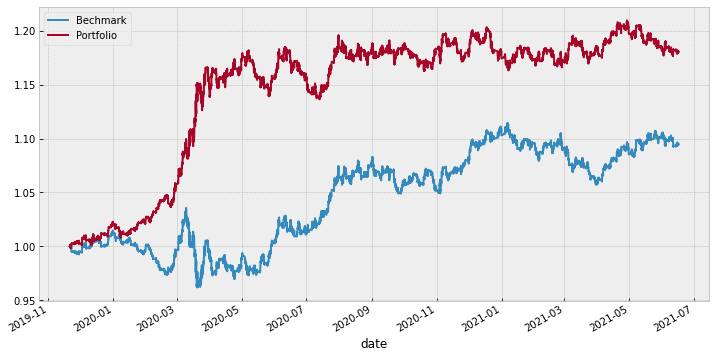

In [6]:
data.dropna()[['returns', 'strategy']].cumsum().apply(np.exp).plot()
plt.legend(['Bechmark', 'Portfolio'])
plt.show()